In [1]:
import pandas as pd
import numpy as np
import random 

In [2]:
# Load the Data set
df = pd.read_csv(r"C:\Users\amand\Downloads\SAP_Login_Fraud_Detection\login_logs_with_fraud.csv")

In [3]:
#show the top few data set
df.head()

,user_id,login_time,ip_address,device,location,hour,is_fraud
0,U101,10-05-2025 21:16,81.154.20.149,Chrome_Win,India,21,0
1,U103,06-05-2025 02:21,113.163.209.250,Firefox_Mac,India,2,1
2,U101,11-05-2025 08:07,178.200.51.240,Chrome_Linux,India,8,0
3,U109,10-05-2025 07:01,33.232.50.155,Edge_Win,India,7,0
4,U100,04-05-2025 06:19,112.108.176.251,Chrome_Win,India,6,0


In [7]:
#understand columns and data types
df.columns
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     50 non-null     object
 1   login_time  50 non-null     object
 2   ip_address  50 non-null     object
 3   device      50 non-null     object
 4   location    50 non-null     object
 5   hour        50 non-null     int64 
 6   is_fraud    50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB
Index(['user_id', 'login_time', 'ip_address', 'device', 'location', 'hour',
       'is_fraud'],
      dtype='object')


In [9]:
#Summary Statistics 
df.describe()

,hour,is_fraud
count,50.00000,50.000000
mean,11.46000,0.320000
std,7.39611,0.471212
min,0.00000,0.000000
25%,4.50000,0.000000
50%,11.00000,0.000000
75%,17.00000,1.000000
max,23.00000,1.000000


In [11]:
#null values check 
df.isnull().sum()

user_id       0
login_time    0
ip_address    0
device        0
location      0
hour          0
is_fraud      0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [14]:
# Step 1: Convert login_time to datetime and extract hour
df['login_time'] = pd.to_datetime(df['login_time'], errors='coerce')
df['hour'] = df['login_time'].dt.hour

# Step 2: Encode categorical variables
categorical_columns = ['user_id', 'ip_address', 'location', 'device']
df_encoded = pd.get_dummies(df[categorical_columns + ['hour']], drop_first=True)

# Step 3: Add target variable to encoded dataframe
df_encoded['is_fraud'] = df['is_fraud']


In [15]:
# Step 1: Convert login_time to datetime and extract hour
df['login_time'] = pd.to_datetime(df['login_time'], errors='coerce')
df['hour'] = df['login_time'].dt.hour

# Step 2: Encode categorical variables
categorical_columns = ['user_id', 'ip_address', 'location', 'device']
df_encoded = pd.get_dummies(df[categorical_columns + ['hour']], drop_first=True)

# Step 3: Add target variable to encoded dataframe
df_encoded['is_fraud'] = df['is_fraud']


In [16]:
# Encode categorical variables
categorical_columns = ['user_id', 'ip_address', 'location', 'device']  # Adjust as per your columns
df_encoded = pd.get_dummies(df[categorical_columns + ['hour']], drop_first=True)

# Add label
df_encoded['is_fraud'] = df['is_fraud']


In [21]:
# Train the model
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(df['is_fraud'].value_counts())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

is_fraud
0    34
1    16
Name: count, dtype: int64


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_index = X_test.index


In [29]:
# Original readable test data
readable_test_data = df.loc[X_test_index].copy()   # df = original DataFrame

# Add actual and predicted columns
readable_test_data['Actual'] = y_test.values
readable_test_data['Predicted'] = y_pred

# Show first few rows
readable_test_data.head(10)



,user_id,login_time,ip_address,device,location,hour,is_fraud,Actual,Predicted
13,U105,2025-09-05 15:13:00,88.57.232.68,Safari_Mac,Germany,15,0,0,0
39,U102,2025-12-05 10:54:00,135.35.171.186,Edge_Win,Germany,10,0,0,0
30,U103,2025-04-05 19:42:00,116.52.48.139,Chrome_Linux,India,19,0,0,1
45,U106,2025-09-05 16:08:00,200.0.149.235,Firefox_Mac,China,16,1,1,0
17,U109,2025-04-05 02:16:00,169.227.59.103,Safari_Mac,Germany,2,1,1,0
48,U104,2025-06-05 00:46:00,69.10.91.1,Chrome_Linux,Germany,0,1,1,1
26,U106,2025-07-05 23:52:00,121.176.23.197,Safari_Mac,USA,23,1,1,1
25,U103,2025-05-05 21:44:00,174.134.12.63,Firefox_Mac,China,21,1,1,0
32,U107,2025-07-05 12:28:00,114.54.155.88,Firefox_Mac,Chennai,12,0,0,0
19,U103,2025-05-05 02:24:00,45.104.144.43,Safari_Mac,India,2,1,1,0


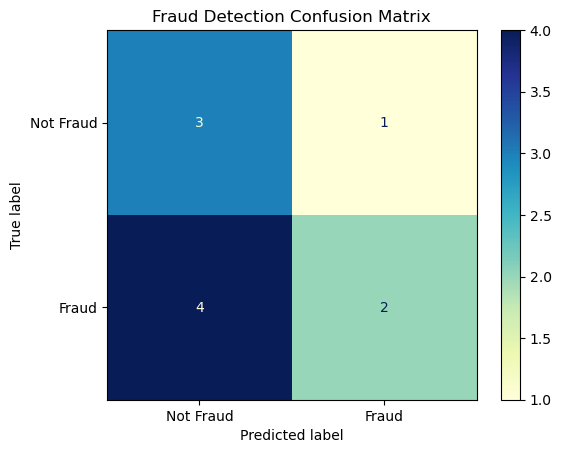

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="YlGnBu")
plt.title("Fraud Detection Confusion Matrix")
plt.grid(False)
plt.show()

C:\Users\amand\AppData\Local\Temp\ipykernel_12412\1677738571.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features, y=top_10_features.index, palette="crest")


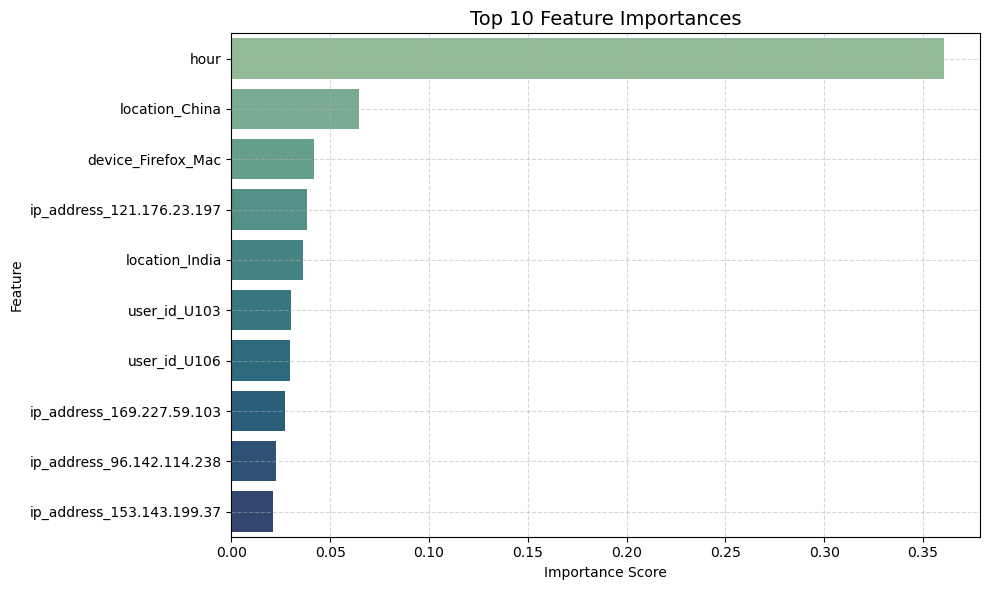

In [32]:
import pandas as pd
#Show the Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Top 10 features descending order me
top_10_features = feature_importance.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features, y=top_10_features.index, palette="crest")

plt.title("Top 10 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:

# 🔴 Fraud Example (Login at 2:15 AM – suspicious time)
fraud_sample = {
    'user_id': 'U110',
    'login_time': '14-05-2025 02:15',
    'ip_address': '192.168.1.10',
    'device': 'Chrome_Win',
    'location': 'India'
}

# 🟢 Non-Fraud Example (Login at 10:00 AM – normal time)
nonfraud_sample = {
    'user_id': 'U111',
    'login_time': '14-05-2025 10:00',
    'ip_address': '112.47.6.185',
    'device': 'Chrome_Win',
    'location': 'India'
}

# Combine both samples into a list
samples = [fraud_sample, nonfraud_sample]

# Convert to DataFrame
sample_df = pd.DataFrame(samples)

# Parse login_time and extract hour
sample_df['login_time'] = pd.to_datetime(sample_df['login_time'], dayfirst=True)
sample_df['hour'] = sample_df['login_time'].dt.hour

# One-hot encoding (only on selected features)
sample_encoded = pd.get_dummies(sample_df[['device', 'location', 'hour']])

# Align columns with training set (fill missing with 0)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Predict
predictions = model.predict(sample_encoded) 

# Output results
for i, pred in enumerate(predictions):
    status = " 1 - Fraud Detected!" if pred == 1 else " 0 - No Fraud Detected."
    print(f"User {sample_df.iloc[i]['user_id']} - {status}")


User U110 -  1 - Fraud Detected!
User U111 -  0 - No Fraud Detected.
